In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [7]:
response = df['response'].value_counts()

In [8]:
response

no     9316
yes    1373
Name: response, dtype: int64

<AxesSubplot:title={'center':'Bar plot of responses'}, ylabel='response'>

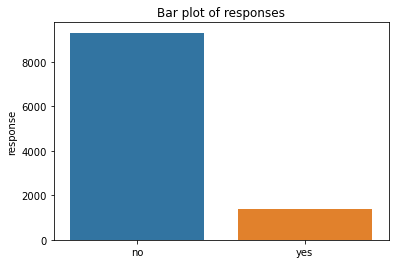

In [9]:
# create figure and axes
# subplots()
fig3, ax3 = plt.subplots()
# set title
# set_title()
ax3.set_title("Bar plot of responses")
# plot the bar chart
# bar()

sns.barplot(x=response.index ,y =response)

In [10]:
<AxesSubplot:title={'center':'Bar plot of response'}, ylabel='response'>

SyntaxError: invalid syntax (701691698.py, line 1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [17]:
#plot of the response by the sales channel

In [31]:
sales_channel = df['sales_channel'].value_counts()
sales_channel

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

<AxesSubplot:ylabel='sales_channel'>

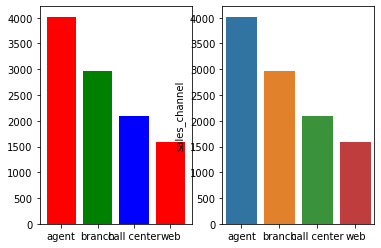

In [32]:
# create figure and axes
fig20, ax20 = plt.subplots(1,2)

# plot the bar chart
# With matplotlib
ax20[0].bar(x= sales_channel.index, height = sales_channel, color = ['r','g',"b"])
#ax20[1].bar(x=p_class.index, height = p_class)

# With seaborn
sns.barplot(x = sales_channel.index, y = sales_channel)

In [ ]:
#plot of the response by the total claim amount

In [33]:
number_of_open_complaints = df['number_of_open_complaints'].value_counts()
number_of_open_complaints

0    8472
1    1205
2     436
3     334
4     174
5      68
Name: number_of_open_complaints, dtype: int64

In [36]:
df ['rounded_claim_amount'] = df['total_claim_amount'].apply(round, ndigits = -2)
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,rounded_claim_amount
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize,300
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize,700
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize,500
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize,500
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize,1200
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize,300
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize,400
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize,600


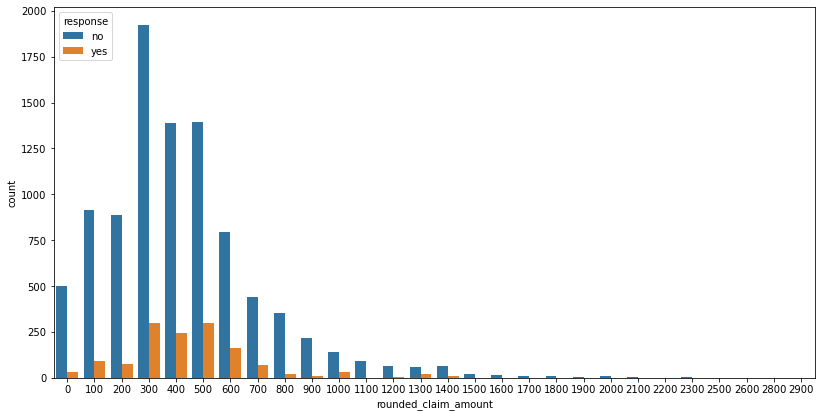

In [77]:
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
sns.countplot(x ='rounded_claim_amount', hue = 'response', data = df)
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [59]:
# create figure and axes
fig24, ax24 = plt.subplot(1,2)

# plot the bar chart
# With matplotlib
ax24[0].bar(x= number_of_open_complaints.index, height = number_of_open_complaints, color = ['r','g',"b"])
#ax24[1].bar(x=p_class.index, height = p_class)


TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 432x288 with 0 Axes>

<BarContainer object of 6 artists>

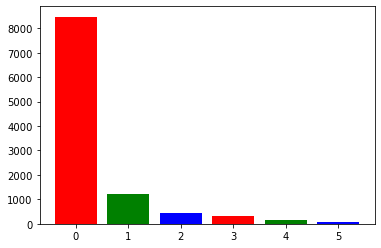

In [69]:
# create figure and axes
fig24, ax24 = plt.subplots(1,1)

# plot the bar chart
# With matplotlib
ax24.bar(x= number_of_open_complaints.index, height = number_of_open_complaints, color = ['r','g',"b"])
#ax24[1].bar(x=p_class.index, height = p_class)

# With seaborn
#sns.barplot(x = number_of_open_complaints)

In [66]:
number_of_open_complaints

0    8472
1    1205
2     436
3     334
4     174
5      68
Name: number_of_open_complaints, dtype: int64

<AxesSubplot:xlabel='number_of_open_complaints', ylabel='count'>

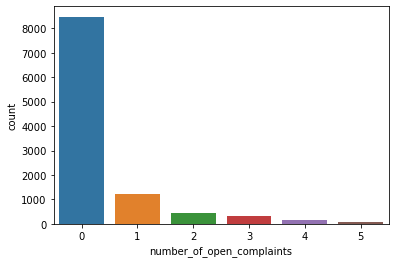

In [71]:
sns.countplot(x = df.number_of_open_complaints)

In [49]:

# With seaborn
sns.barplot(x = number_of_open_complaints.index, y=sales_channel.index)

ValueError: Grouper and axis must be same length

In [ ]:
#plot of the response by income.

NameError: name 'income' is not defined

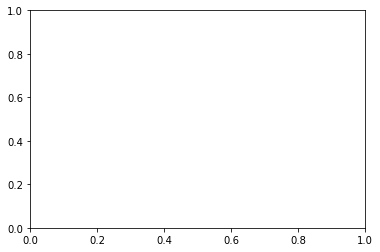

In [74]:
fig24, ax24 = plt.subplots(1,1)

# plot the bar chart
# With matplotlib
ax24.bar(x= income.index, height = income, color = ['r','g',"b"])
#ax24[1].bar(x=p_class.index, height = p_class)


<AxesSubplot:xlabel='income', ylabel='count'>

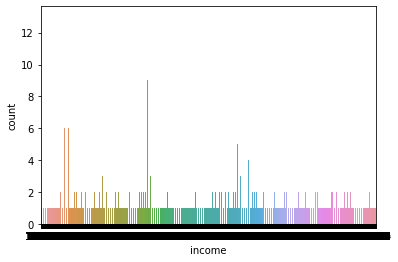

In [75]:
sns.countplot(x = df.income)

In [ ]:
#(Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.

In [87]:
numerical_df= df.select_dtypes(include='int64')
categoricals_df= df.select_dtypes(include='object')

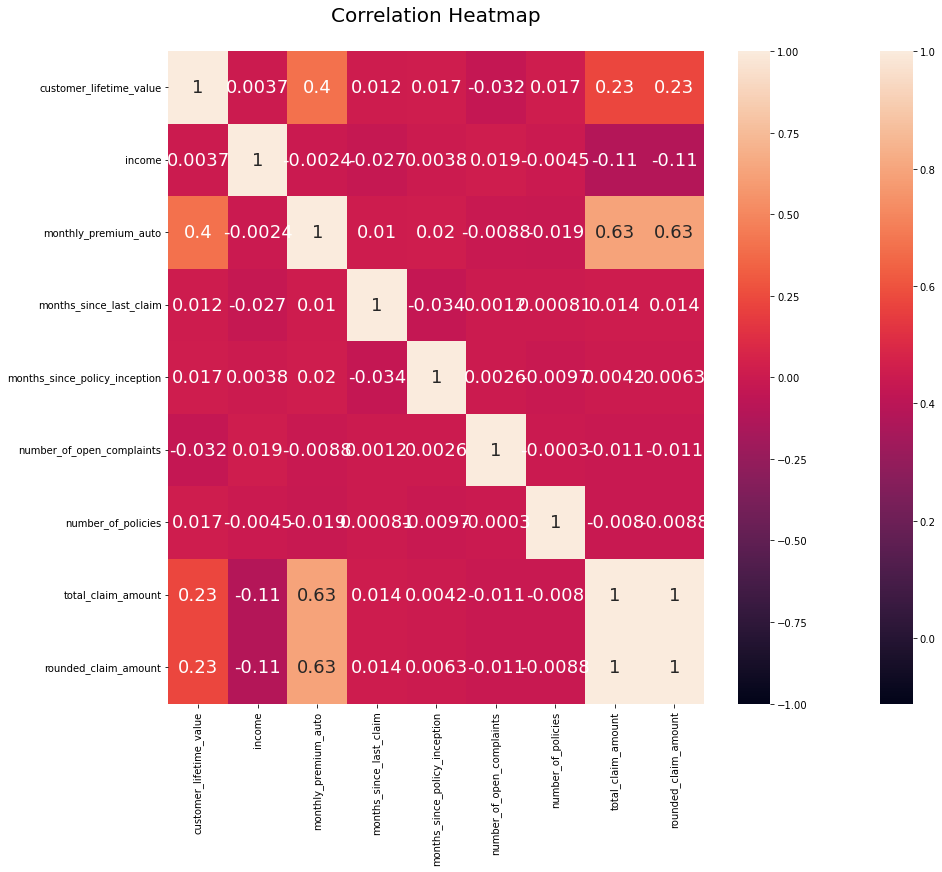

In [89]:
###-Plot the Correlation Heatmap.(3 wednsday)
plt.figure(figsize=(15,12))
heatmap=sns.heatmap(numerical_df.corr())
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=30)
heatmap = sns.heatmap(numerical_df.corr(),annot_kws={"size":18}, vmin=-1, vmax=1, annot= True) 
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')